In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('./income_final.csv', encoding='utf8')

In [3]:
df

,Unnamed: 0,State_Name,State_ab,Lat,Lon,Mean,Median,Stdev,easting,northing,zone_number,zone_letter
0,18841,New York,NY,43.810218,-76.022978,54499,37697,48943,417722.480944,4.851303e+06,18,T
1,18843,New York,NY,41.848203,-73.555575,82188,56048,67388,619909.143604,4.633931e+06,18,T
2,18844,New York,NY,42.070565,-76.162636,73219,54363,55251,403819.017874,4.658265e+06,18,T
3,18845,New York,NY,40.588013,-73.729360,131519,114157,78333,607526.764688,4.493800e+06,18,T
4,18846,New York,NY,42.301697,-75.478883,52841,44096,42015,460527.894216,4.683385e+06,18,T
5,18847,New York,NY,40.606348,-73.645982,110516,91529,71566,614551.445436,4.495941e+06,18,T
6,18848,New York,NY,41.447173,-74.118707,100299,102874,56742,573615.263383,4.588774e+06,18,T
7,18850,New York,NY,41.068236,-73.954937,123435,115560,76643,587801.368729,4.546858e+06,18,T
8,18851,New York,NY,43.480862,-75.329636,48744,30120,49269,473342.375359,4.814269e+06,18,T
9,18852,New York,NY,43.149446,-75.985310,56966,300000,38069,419883.657551,4.777882e+06,18,T


In [4]:
X = df[['easting','northing']]

In [5]:
X

,easting,northing
0,417722.480944,4.851303e+06
1,619909.143604,4.633931e+06
2,403819.017874,4.658265e+06
3,607526.764688,4.493800e+06
4,460527.894216,4.683385e+06
5,614551.445436,4.495941e+06
6,573615.263383,4.588774e+06
7,587801.368729,4.546858e+06
8,473342.375359,4.814269e+06
9,419883.657551,4.777882e+06


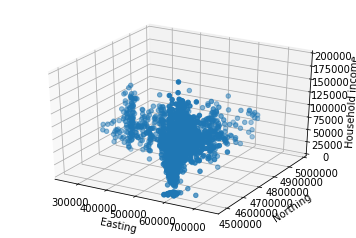

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xForViz = np.array(X)
xline = np.array(xForViz[:,0])
yline = np.array(xForViz[:,1])
zline = np.array(df.Mean)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Household income')
ax.set_zlim(0,200000)

ax.scatter(xline, yline, zline, 'gray')

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [8]:
model1 = lm.fit(X, df.Mean)

In [9]:
#pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

Text(0.5,1,'Relation between latitude(northing) and Mean household income')

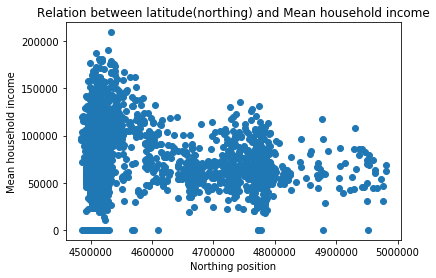

In [10]:
plt.scatter(df.northing, df.Mean)
plt.xlabel('Northing position')
plt.ylabel('Mean household income')
plt.title('Relation between latitude(northing) and Mean household income')

Text(0.5,1,'Relation between longitude(easting) and Mean household income')

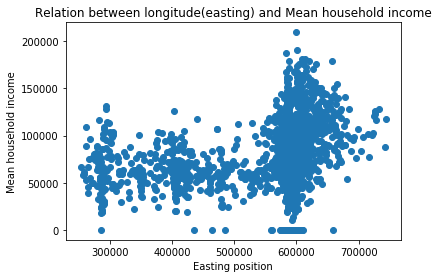

In [11]:
plt.scatter(df.easting, df.Mean)
plt.xlabel('Easting position')
plt.ylabel('Mean household income')
plt.title('Relation between longitude(easting) and Mean household income')

## Comparing predicted value using regression and actual values

Text(0.5,1,'Income vs Predicted Income: $I_i$ vs $\\hat{I}_i$')

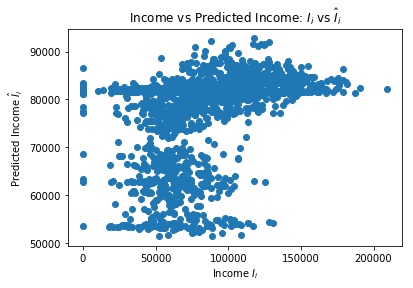

In [12]:
plt.scatter(df.Mean, lm.predict(X))
plt.xlabel('Income $I_i$')
plt.ylabel('Predicted Income $\hat{I}_i$')
plt.title('Income vs Predicted Income: $I_i$ vs $\hat{I}_i$')

## Calculating MSE (Mean Square Error)

In [13]:
mseFull = np.mean((df.Mean- lm.predict(X))**2)
mseFull

1095097248.9658282

In [14]:
lm.fit_intercept

True

In [15]:
print('Score:', model1.score(X, df.Mean))

Score: 0.06882668937544678


## Implementing Training and validation data sets

In [16]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, df.Mean, test_size = 0.33, random_state = 5)

In [17]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1325, 2) (1325,)
(653, 2) (653,)


In [18]:
lm2 = LinearRegression()

In [19]:
model2 = lm2.fit(X_train,Y_train)
pred_train = lm2.predict(X_train)
pred_test = lm2.predict(X_test)

Text(0.5,1,'Validation and training: Income vs Predicted Income: $I_i$ vs $\\hat{I}_i$')

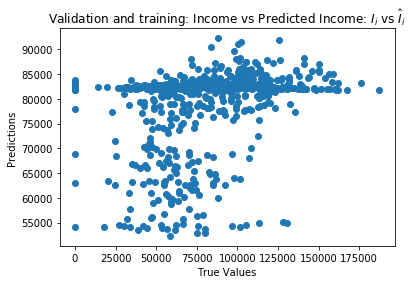

In [20]:
## The line / model
plt.scatter(Y_test, pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Validation and training: Income vs Predicted Income: $I_i$ vs $\hat{I}_i$')

In [21]:
print('Score:', model2.score(X_test, Y_test))

Score: 0.06774900153350583


### Plotting residuals


In [22]:
xplot = np.array(X_test)
zplot = np.array(Y_test - pred_test)

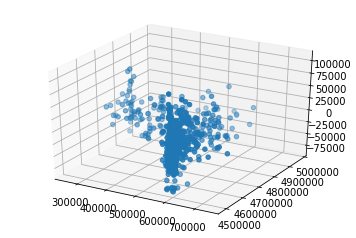

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xplot = np.array(X_test)
xline = np.array(xplot[:,0])
yline = np.array(xplot[:,1])
zline = zplot

ax.scatter(xline, yline, zline, 'gray')

# Cross Validation to see if the model improves

In [24]:
Y = np.array(df.Mean)

In [25]:
from sklearn.model_selection import KFold

In [26]:
number_of_splits = 10

In [27]:
kf = KFold(n_splits=number_of_splits, shuffle=True,random_state = 12) # Define the split - into 10 folds

In [28]:
kf.get_n_splits(X)

10

In [29]:
x_array = np.array(X)

In [30]:
x_array

array([[ 417722.48094394, 4851303.02873174],
       [ 619909.14360379, 4633931.09515497],
       [ 403819.01787389, 4658264.9315452 ],
       ...,
       [ 588353.28752138, 4506061.86393256],
       [ 588079.76779786, 4506395.88711137],
       [ 587865.1454046 , 4506008.24066836]])

In [31]:
x_array[1]

array([ 619909.14360379, 4633931.09515497])

In [32]:
i = 0
scores = np.zeros(number_of_splits)
for train_index, test_index in kf.split(X):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    lm3 = LinearRegression()
    model3 = lm3.fit(x_array[train_index], Y[train_index])
    scores[i] = model3.score(x_array[test_index], Y[test_index])
    i = i + 1
    
averageR2 = sum(scores)/number_of_splits
print(averageR2)
 

0.06659650972822881


## Another Cross Validation

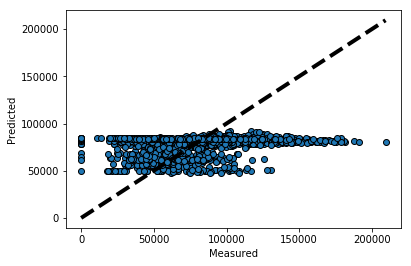

In [33]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, x_array, Y, cv=10)

fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Testing polyfit

In [71]:
from sklearn.preprocessing import PolynomialFeatures  


j = 0
degrees = [2,3,4, 5, 6, 7, 8, 9 ,10, 11, 12,13,15,16,17,18,19,20,25,30]
pols = np.zeros(len(degrees))
for degree in degrees:
    i = 0
    scores = np.zeros(number_of_splits)
    for train_index, test_index in kf.split(X):
        # create a Linear Regressor   
        lin_regressor = LinearRegression()
        # pass the order of your polynomial here  
        poly = PolynomialFeatures(degree)
        # convert to be used further to linear regression
        X_train_transform = poly.fit_transform(x_array[train_index])
        X_test_transform = poly.fit_transform(x_array[test_index])
        # fit this to Linear Regressor
        model4 = lin_regressor.fit(X_train_transform,Y[train_index]) 
        # get the predictions
        y_preds = lin_regressor.predict(X_test_transform)
        score_local = model4.score(X_test_transform, Y[test_index])
        scores[i] = score_local
        i = i + 1
    averageScore = sum(scores)/number_of_splits
    #print('Average score for cross validation cv', averageScore)
    pols[j] = averageScore
    j = j + 1

print(pols)
max_score_pols = max(pols)
index_max = pols.tolist().index(max_score_pols)

X_training, X_testing, Y_training, Y_testing = sklearn.model_selection.train_test_split(X, df.Mean, test_size = 0.33, random_state = 5)

# create a Linear Regressor   
lin_regressor = LinearRegression()
# pass the order of your polynomial here  
poly = PolynomialFeatures(degrees[index_max])
# convert to be used further to linear regression
X_train_transform = poly.fit_transform(X_training)
X_test_transform = poly.fit_transform(X_testing)
# fit this to Linear Regressor
model5 = lin_regressor.fit(X_train_transform,Y_training) 
# get the predictions
y_preds = lin_regressor.predict(X_test_transform)
score_local = model5.score(X_test_transform, Y_testing)#np.mean((Y[test_index]- y_preds)**2)

#print()
print('The best average degree polynomial is: ',degrees[index_max])
print('The score for that polynomial is: ', score_local)   

[0.12238325 0.12505451 0.13377426 0.13049084 0.12808574 0.1302486
 0.13462553 0.13739138 0.13894923 0.13841353 0.13627076 0.13033493
 0.13472024 0.1421165  0.13327183 0.1305659  0.13123643 0.12949778
 0.12905404 0.12762314]
The best average degree polynomial is:  16
The score for that polynomial is:  0.12325526546824195


In [72]:
max(scores)

0.23377657712267397

## Plotting residuals for polyfit

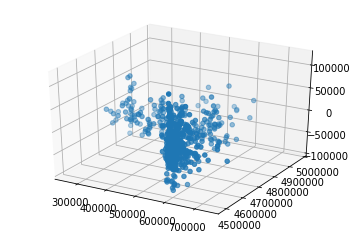

In [73]:
xplot = np.array(X_testing)
zplot = np.array(Y_testing - y_preds)
fig = plt.figure()
ax = plt.axes(projection='3d')
xplot = np.array(X_test)
xline = np.array(xplot[:,0])
yline = np.array(xplot[:,1])
zline = zplot

ax.scatter(xline, yline, zline, 'gray')

# KNN v1

In [77]:
X_training, X_testing, Y_training, Y_testing = sklearn.model_selection.train_test_split(X, df.Mean, test_size = 0.33, random_state = 5)


In [82]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_training)

X_training = scaler.transform(X_training)  
X_testing = scaler.transform(X_testing)  

In [83]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_training) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [84]:
y_pred = classifier.predict(X_testing) 

In [85]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_testing, y_pred))  
print(classification_report(Y_testing, y_pred))  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
      13978       0.00      0.00      0.00         1
      17659       0.00      0.00      0.00         1
      19928       0.00      0.00      0.00         1
      20511       0.00      0.00      0.00         1
      22770       0.00      0.00      0.00         1
      24505       0.00      0.00      0.00         1
      24571       0.00      0.00      0.00         1
      25591       0.00      0.00      0.00         1
      26689       0.00      0.00      0.00         1
      27010       0.00      0.00      0.00         1
      27359       0.00      0.00      0.00         1
      27488       0.00      0.00      0.00         1
      29943       0.00      0.00      0.00         1
      30108       0.00      0.00      0.00         1
      30287       0.00      0.0

/Users/damaderu/Documents/programming/ML/anaconda/envs/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/damaderu/Documents/programming/ML/anaconda/envs/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
